In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline

# Manipulación y preparación de datos

In [3]:
df = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv", sep=',', header='infer')
df.head()

,Region,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,Bejaia,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,Bejaia,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,Bejaia,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,Bejaia,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire
4,Bejaia,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [4]:
#imprimimos las columnas
df.tail()

,Region,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
239,Sidi-Bel Abbes,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
240,Sidi-Bel Abbes,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
241,Sidi-Bel Abbes,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,Sidi-Bel Abbes,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
243,Sidi-Bel Abbes,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


#### LIMPIEZA DE DATOS

In [6]:
df.columns

Index(['Region', 'day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [7]:
#eliminamos espacios
df.columns = df.columns.str.strip()
df.columns

Index(['Region', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [8]:
#mostramos la informacion de las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Region       244 non-null    object 
 1   day          244 non-null    int64  
 2   month        244 non-null    int64  
 3   year         244 non-null    int64  
 4   Temperature  244 non-null    int64  
 5   RH           244 non-null    int64  
 6   Ws           244 non-null    int64  
 7   Rain         244 non-null    float64
 8   FFMC         244 non-null    float64
 9   DMC          244 non-null    float64
 10  DC           244 non-null    object 
 11  ISI          244 non-null    float64
 12  BUI          244 non-null    float64
 13  FWI          244 non-null    object 
 14  Classes      243 non-null    object 
dtypes: float64(5), int64(6), object(4)
memory usage: 28.7+ KB


In [9]:
#ubicamos la columnas con datos NaN
df.isnull().sum()

Region         0
day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

In [10]:
#ubicamos la columna con datos nulls
df[df.isnull().any(axis=1)]

,Region,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
165,Sidi-Bel Abbes,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [11]:
df['Region'] = 1
for i in range(len(df)):
  if i >= 122:
    df['Region'][i] = 2 

In [12]:
#limpiar datos nulos
df = df.dropna().reset_index(drop = True)

In [13]:
df.isnull().sum()

Region         0
day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [14]:
#verificamos la cantidad de valores para reducir los tipos de clases a 2
df.value_counts('Classes')

Classes
fire             131
not fire         101
fire               4
not fire           3
fire               2
not fire           1
not fire           1
Name: count, dtype: int64

In [15]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     '], dtype=object)

In [16]:
#mostramos la columna para clasificar en fuego y no fuego
df['Classes'] = df['Classes'].str.strip()
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [17]:
#limpiamos los espacios en blanco para reducirlo a 2 opciones
df = df[df.Classes.isin(['fire','not fire'])]

In [18]:
#imprimimos la columna clases para ver los cambios
df["Classes"].unique()

array(['not fire', 'fire'], dtype=object)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Region       243 non-null    int64  
 1   day          243 non-null    int64  
 2   month        243 non-null    int64  
 3   year         243 non-null    int64  
 4   Temperature  243 non-null    int64  
 5   RH           243 non-null    int64  
 6   Ws           243 non-null    int64  
 7   Rain         243 non-null    float64
 8   FFMC         243 non-null    float64
 9   DMC          243 non-null    float64
 10  DC           243 non-null    object 
 11  ISI          243 non-null    float64
 12  BUI          243 non-null    float64
 13  FWI          243 non-null    object 
 14  Classes      243 non-null    object 
dtypes: float64(5), int64(7), object(3)
memory usage: 28.6+ KB


#### Transformación de datos

In [21]:
df = df.astype({ 
                'RH':np.int64, 'Temperature':np.int64, 
                'Ws':np.int64, 'Rain':np.float64, 
                'FFMC':np.float64 ,'DMC':np.float64, 
                'DC':np.float64, 'ISI':np.float64, 
                'BUI':np.float64, 'FWI':np.float64
                })

# EDA

In [23]:
#estadísticas descriptica para variables númericas
numerica = df.describe()
print("Estadística descriptiva para variables númericas:")
display(numerica)
#estadísticas descriptiva para variables categoricas
categoricas = df.describe(include='object')
print("Estadística descriptiva para varibales categoricas:")
display(categoricas)

Estadística descriptiva para variables númericas:


,Region,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,243.000000,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,1.497942,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391
std,0.501028,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568
min,1.000000,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,1.000000,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000
50%,1.000000,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000
75%,2.000000,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000
max,2.000000,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


Estadística descriptiva para varibales categoricas:


,Classes
count,243
unique,2
top,fire
freq,137


# VISUALIZACIONES PARA ANÁLISIS

#### Histogramas para variables categoricas

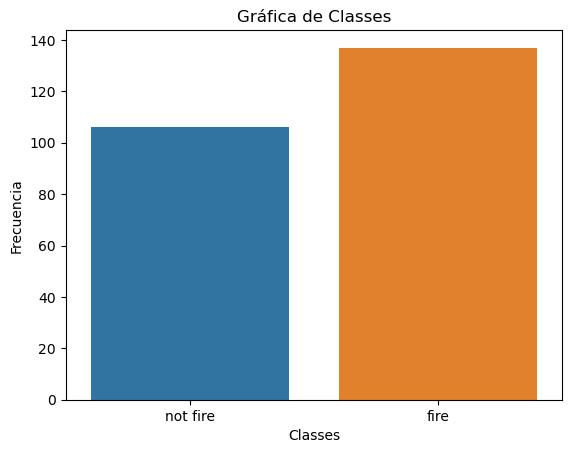

In [26]:
columns = df.describe(include='object')

for column in columns:
    sns.countplot(x=df[column], palette='tab10')
    plt.title(f'Gráfica de {column.capitalize()}')
    plt.xlabel(column)
    plt.ylabel("Frecuencia")
    plt.show()

#### Histrogramas para visualizar los incendios forestales mensualmente según región

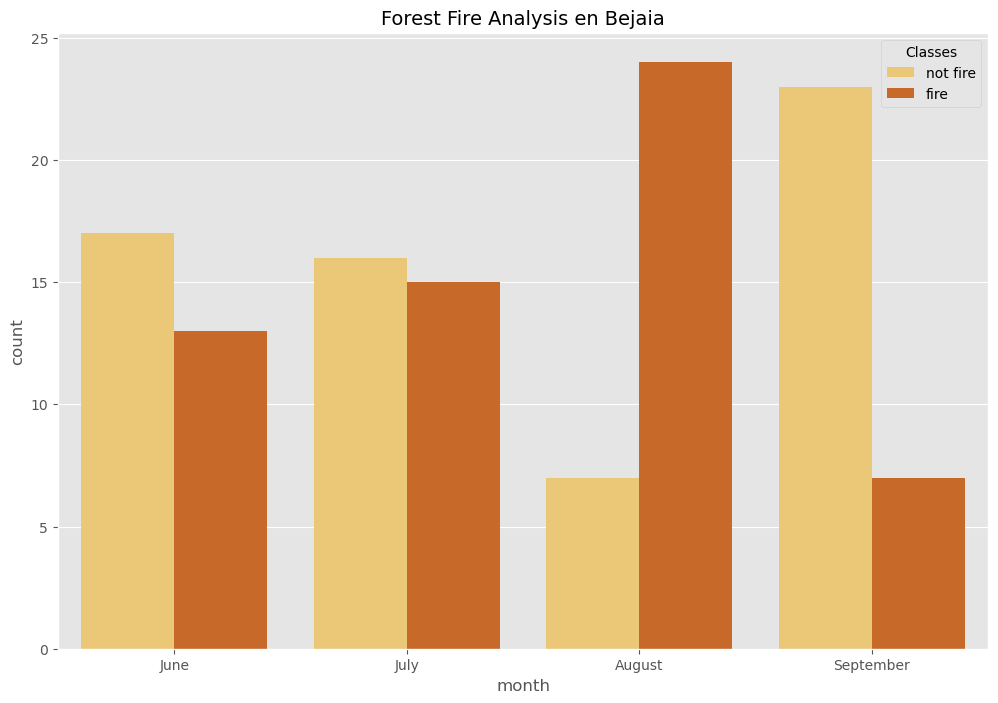

In [28]:
plt.style.use('ggplot')
plt.figure(figsize=(12, 8))
sns.countplot(data= df[df['Region']==1] , x='month', hue='Classes', palette ='YlOrBr')
plt.title('Forest Fire Analysis en Bejaia', fontsize = 14)
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.show()

#### Análisis de incendios mensualmente

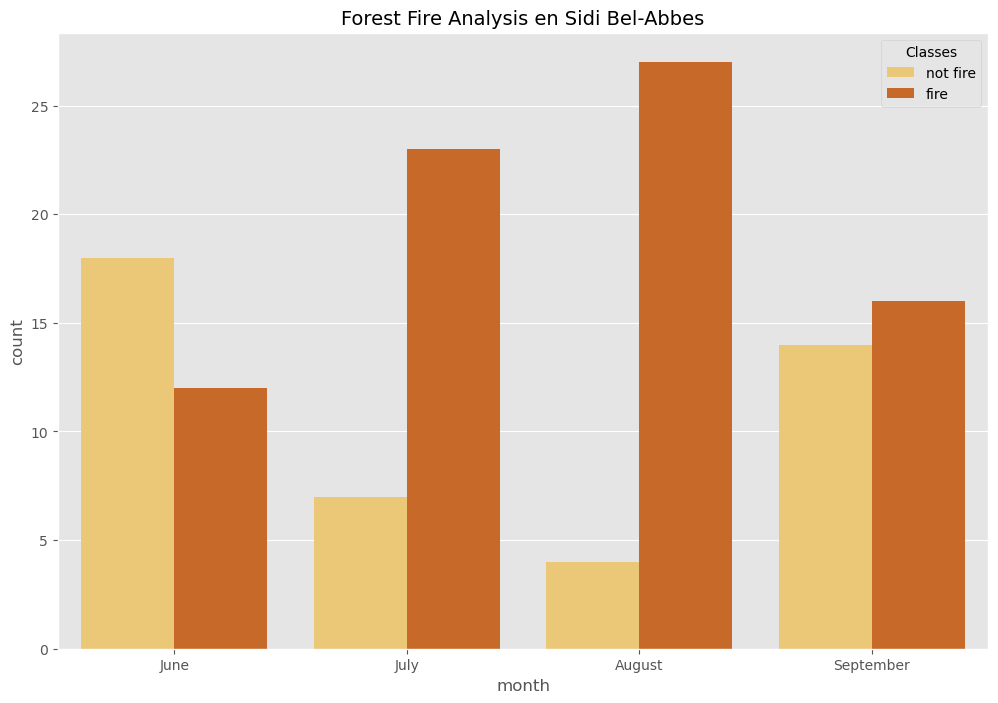

In [30]:
plt.style.use('ggplot')
plt.figure(figsize=(12, 8))
sns.countplot(data= df[df['Region']==2] , x='month', hue='Classes', palette ='YlOrBr')
plt.title('Forest Fire Analysis en Sidi Bel-Abbes', fontsize = 14)
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.show()

#### Distribución de la temperatura por mes

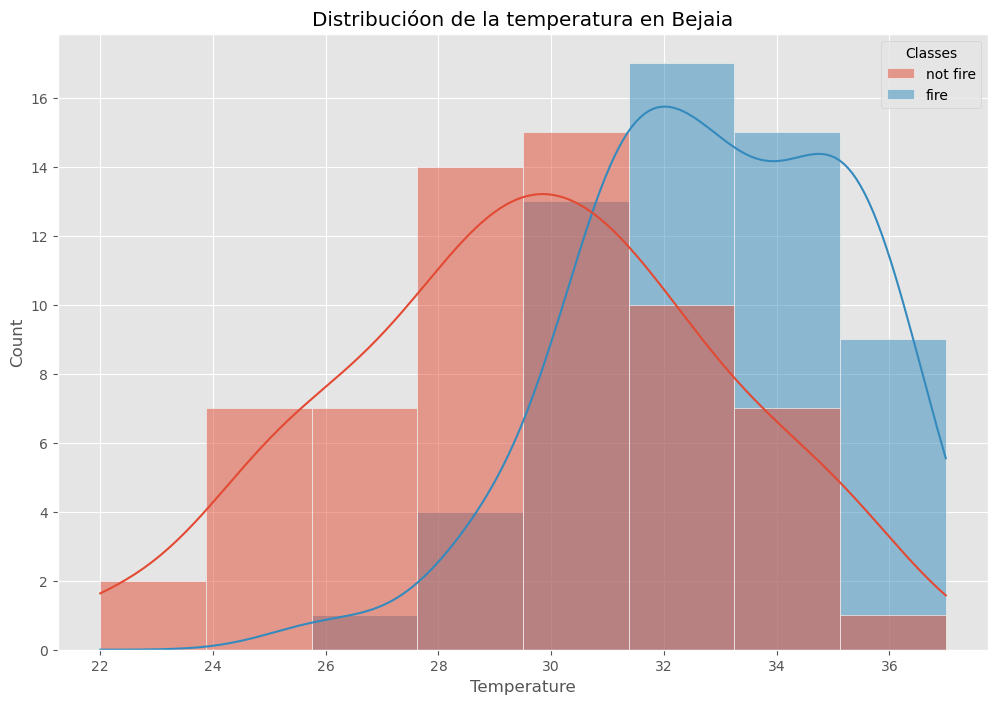

In [32]:
plt.style.use('ggplot')
plt.figure(figsize=(12, 8))
sns.histplot(data= df[df['Region']==1], x= 'Temperature', hue='Classes', kde = True)
plt.title('Distribucióon de la temperatura en Bejaia')
plt.show()

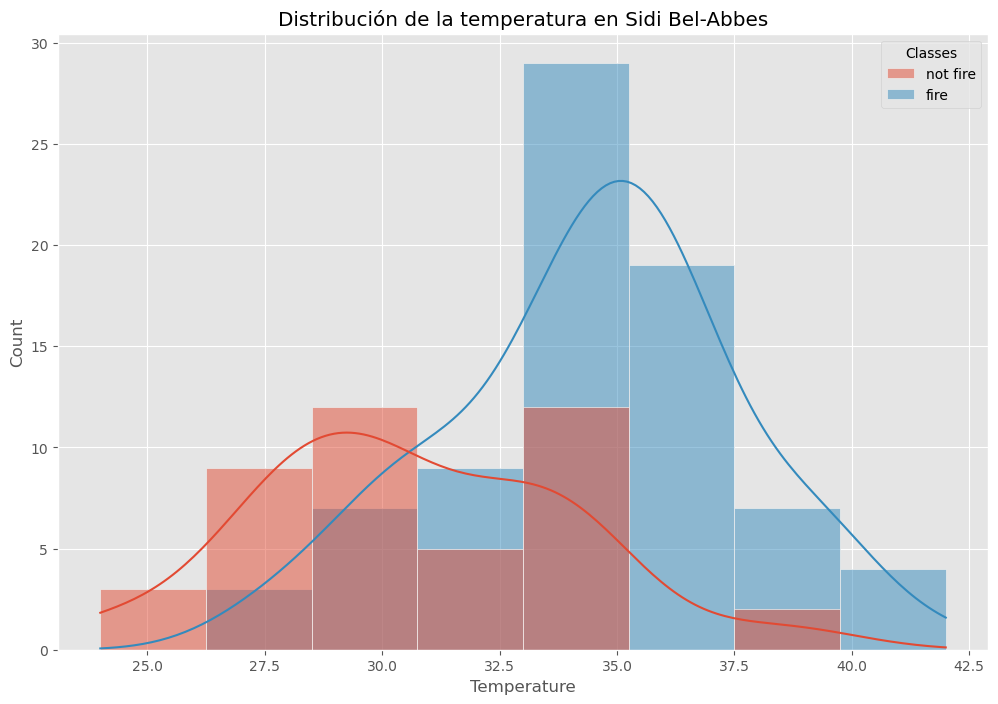

In [33]:
plt.style.use('ggplot')
plt.figure(figsize=(12, 8))
sns.histplot(data= df[df['Region']==2], x= 'Temperature', hue='Classes', kde = True)
plt.title('Distribución de la temperatura en Sidi Bel-Abbes')
plt.show()

#### Distribución de los meses lluviosos por región

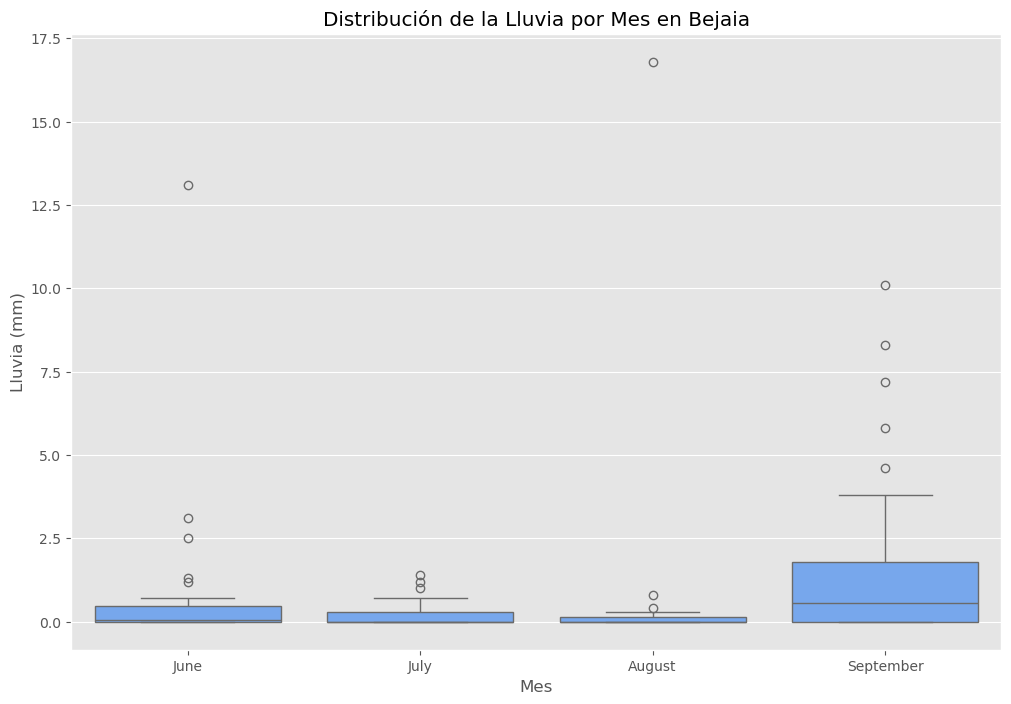

In [35]:
plt.style.use('ggplot')
plt.figure(figsize=(12, 8))

#mostrar la distribución de Rain por Mes
sns.boxplot(data=df[df['Region'] == 1], x='month', y='Rain', color='#64A3FF')
plt.title('Distribución de la Lluvia por Mes en Bejaia')
plt.xlabel('Mes')
plt.xticks(np.arange(4), ['June','July', 'August', 'September'])
plt.ylabel('Lluvia (mm)')
plt.show()

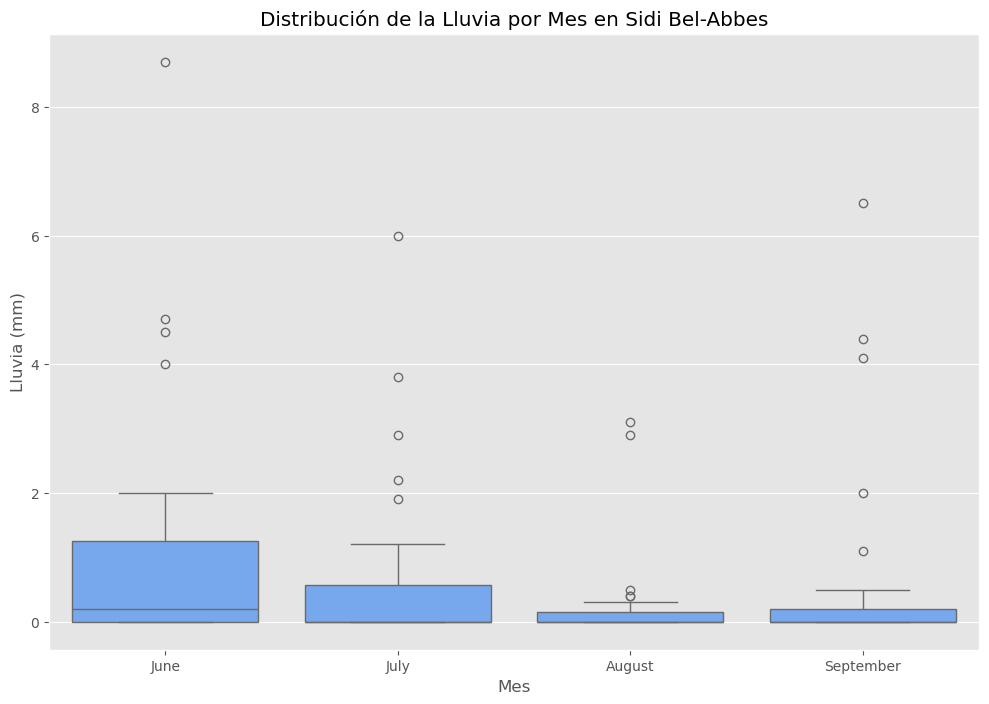

In [36]:
plt.style.use('ggplot')
plt.figure(figsize=(12, 8))

#mostrar la distribución de Rain por Mes
sns.boxplot(data=df[df['Region'] == 2], x='month', y='Rain', color='#64A3FF')
plt.title('Distribución de la Lluvia por Mes en Sidi Bel-Abbes')
plt.xlabel('Mes')
plt.xticks(np.arange(4), ['June','July', 'August', 'September'])
plt.ylabel('Lluvia (mm)')
plt.show()

### PREPROCESAMIENTO

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#Para reducir la dimensionalidad podemos aplicar PCA
#separar la variable objetivo
y = df.loc[:, 'Classes']
df.drop(columns=['Classes'], inplace=True)

#seleccionar características numéricas y categóricas
X = df.select_dtypes(include=['float64', 'int64', 'object'])

#dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
#definir columnas numéricas y categóricas
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

#preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

In [39]:
#crear un pipeline que incluya el preprocesador y PCA
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=0.95))  # Mantener el 95% de la varianza
])

#ajustar y transformar los datos de entrenamiento
X_train_transformed = pipeline.fit_transform(X_train)

#transformar los datos de prueba
X_test_transformed = pipeline.transform(X_test)

#mostrar resultados
print(f"Dimensión original de X_train: {X_train.shape}")
print(f"Dimensión transformada de X_train: {X_train_transformed.shape}")

Dimensión original de X_train: (194, 14)
Dimensión transformada de X_train: (194, 7)
